# Data Cleaning - Awards Players

In [133]:
import pandas as pd
from utils import *
import os

df = pd.read_csv('../data/awards_players.csv')
df.head()

,playerID,award,year,lgID
0,thompti01w,All-Star Game Most Valuable Player,1,WNBA
1,leslili01w,All-Star Game Most Valuable Player,2,WNBA
2,leslili01w,All-Star Game Most Valuable Player,3,WNBA
3,teaslni01w,All-Star Game Most Valuable Player,4,WNBA
4,swoopsh01w,All-Star Game Most Valuable Player,6,WNBA


## Dealing with Missing Values / Features

<Axes: title={'center': 'Number of null values per column'}>

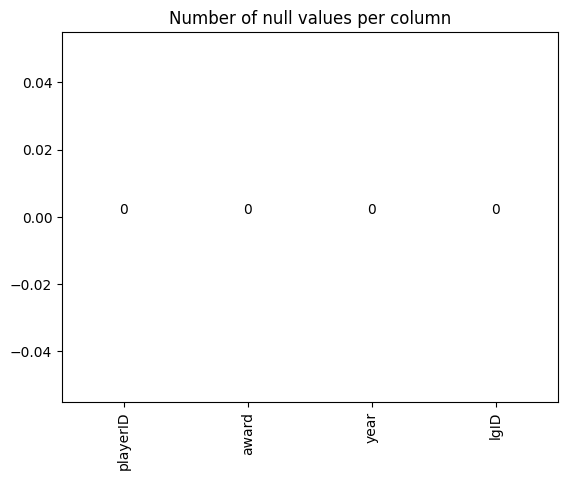

In [134]:
nulls_values_by_column(df)

## Dealing with Duplicate values / Redundant Data

<Axes: title={'center': 'Number of Unique Values Per Column'}>

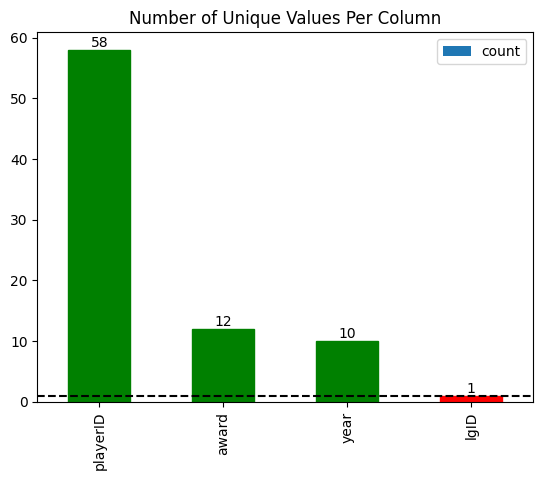

In [135]:
unique_values_by_column(df, 1)

In [136]:
num_columns = len(df.columns)
df = filter_column_uniques(df, 1)
print(f"Removed {num_columns - len(df.columns)} columns that had only one unique value")

Removed 1 columns that had only one unique value


In [137]:
num_rows = df.shape[0]
df.drop_duplicates(inplace=True)
print(f"Removed {num_rows - df.shape[0]} repeated rows")

Removed 0 repeated rows


## Outliers and Noise

### Removing Noise

In [138]:
print(df['award'].unique())

print(df['year'].unique())

['All-Star Game Most Valuable Player' 'Coach of the Year'
 'Defensive Player of the Year' 'Kim Perrot Sportsmanship'
 'Kim Perrot Sportsmanship Award' 'Most Improved Player'
 'Most Valuable Player' 'Rookie of the Year' 'Sixth Woman of the Year'
 'WNBA Finals Most Valuable Player' 'WNBA All-Decade Team'
 'WNBA All Decade Team Honorable Mention']
[ 1  2  3  4  6  7  8 10  5  9]


In [139]:
rows2drop = set()
rows2drop.update(df[df['award'] == 'Coach of the Year'].index)

df.loc[df['award'] == 'Kim Perrot Sportsmanship Award', 'award'] = 'Kim Perrot Sportsmanship'

## Save Dataset

In [140]:
if not os.path.exists('../data_clean'):
    os.makedirs('../data_clean')

df.to_csv('../data_clean/award_players.csv', index=False)